In [6]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xclimate as xclim

In [2]:
%load_ext autoreload
%autoreload 2

%aimport xclimate

In [3]:
cases = [
    "TSAxbin_TOTANNPRECTybin_dETmean",
    "PRDIFFxbin_TLAIybin_dETmean",
    "TSAxbin_TOTANNPRECTybin_dTLAImean",
]
all_bin = {}

rootdir = Path(f"/glade/work/bbuchovecky/et_controls/proc")
bin_timeagg = ["mean", "agg"]
bin_nbin = ["15", "25", "50", "75", "100"]
bin_time = "1995-2014"

for c in cases:
    all_bin[c] = {}
    for t in bin_timeagg:
        all_bin[c][t] = {}
        for nb in bin_nbin:
            print(f"ebin{nb}.{bin_time}.TIME{t}_{c}.*.nc")
            try:
                all_bin[c][t][nb] = xr.open_mfdataset(
                    list((rootdir / f"TIME{t}_{c}").glob(f"ebin{nb}.{bin_time}.TIME{t}_{c}.*.nc")),
                    combine="nested",
                    concat_dim="member",
                ).sortby("member")
            except OSError:
                print("file not found")
                continue

ebin15.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin25.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin50.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin75.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin100.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin15.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin25.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin50.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin75.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin100.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
ebin15.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin25.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin50.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin75.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin100.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin15.1995-2014.TIMEagg_PRDIFFxbin_TLAIybin_dETmean.*.nc
ebin25.1995-2014.TI

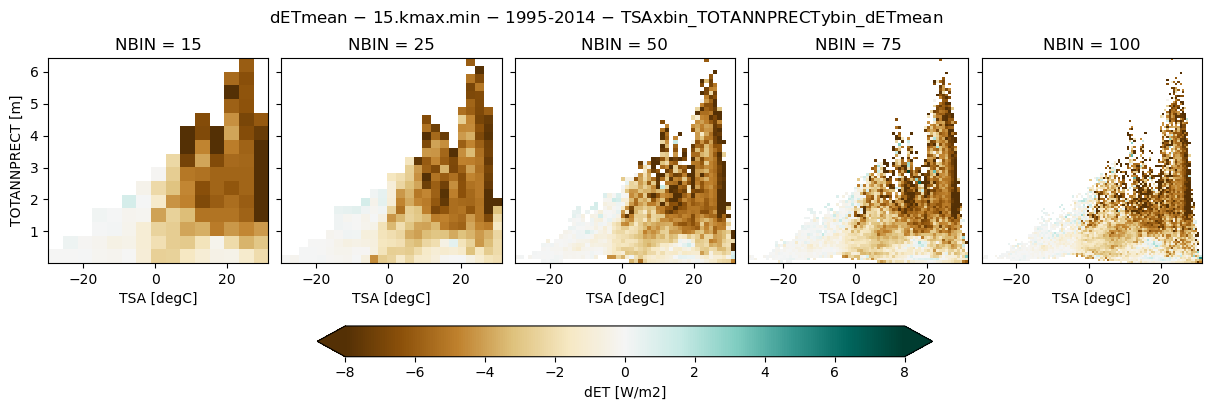

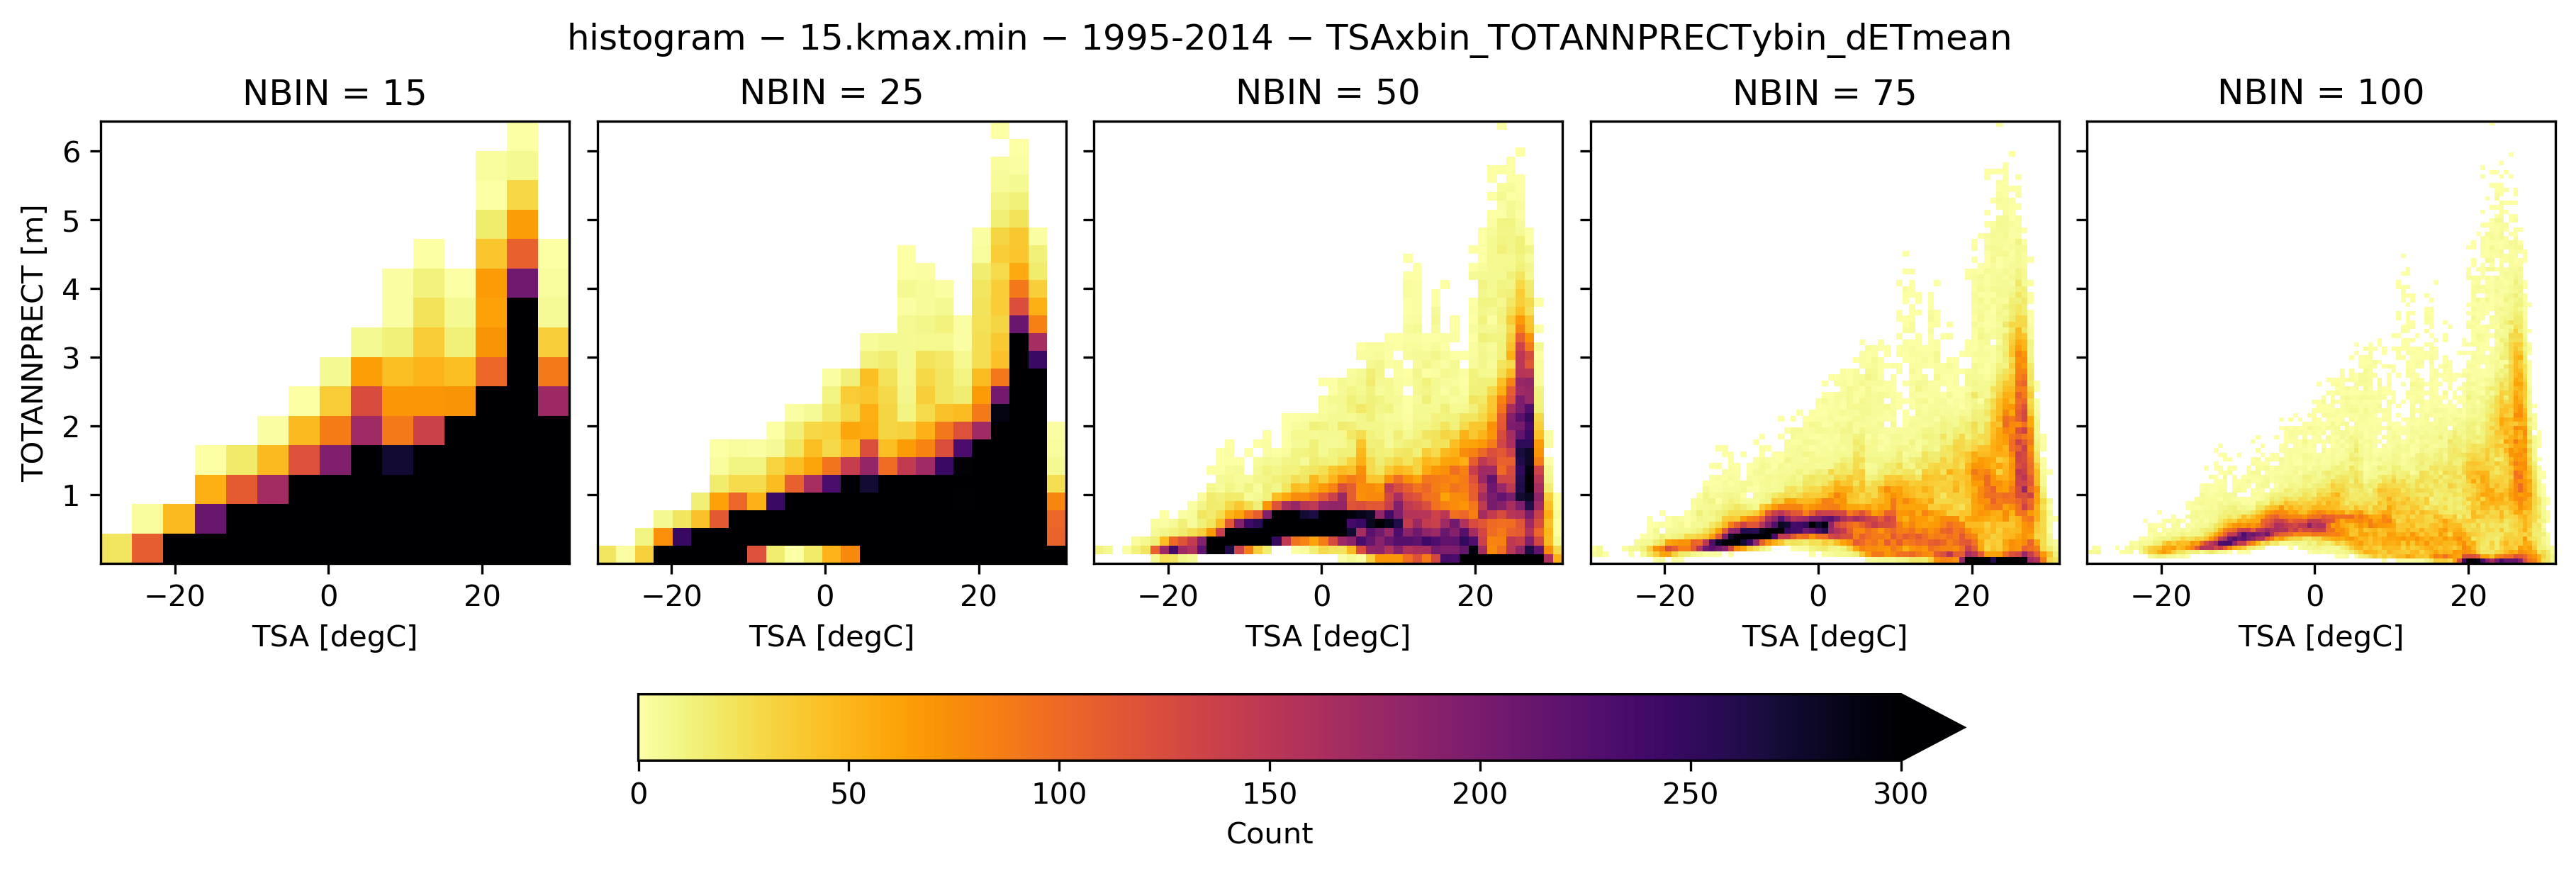

In [ ]:
c = "TSAxbin_TOTANNPRECTybin_dETmean"
t = "agg"

bin = all_bin[c][t]
m = 15

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=100)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].xb_dedge.sel(member=m)
    y = bin[nbin].yb_dedge.sel(member=m) / 1e3
    z = bin[nbin].binned_mean.sel(member=m)
    pcm = ax[i].pcolormesh(x, y, z, vmin=-8, vmax=8, cmap="BrBG")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA [degC]")
ax[0].set_ylabel("TOTANNPRECT [m]")

fig.suptitle(f"dETmean $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="dET [W/m2]", extend="both")

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=300)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].xb_dedge.sel(member=m)
    y = bin[nbin].yb_dedge.sel(member=m) / 1e3
    z = bin[nbin].joint_hist.sel(member=m).where(bin[nbin].joint_hist.sel(member=m) > 0)
    # pcm = ax[i].pcolormesh(x, y, z, vmin=0, cmap="inferno_r")
    pcm = ax[i].pcolormesh(x, y, z, vmin=0, vmax=300, cmap="inferno_r")
    # pcm = ax[i].pcolormesh(x, y, z, norm=mcolors.LogNorm(vmin=1, vmax=100000), cmap="inferno_r")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA [degC]")
ax[0].set_ylabel("TOTANNPRECT [m]")
fig.suptitle(f"histogram $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="Count", extend="max")
# cb.set_ticks([0])

---

In [ ]:
nonglc_pct_threshold = 80
grid = xclim.load_fhist_ppe_grid()
nonglc_mask = grid.PCT_GLC < nonglc_pct_threshold

In [8]:
variables = [
    "PRECC_month_1",
    "PRECL_month_1",
    "TSA_month_1",
    "EFLX_LH_TOT_month_1",
]
time_slice = slice("1995-01", "2014-12")

fhist = {}
for v in variables:
    print(v)
    name = "_".join(v.split("_")[:-2])
    fhist[v] = xclim.load_fhist(v, keep_var_only=True)[name].sel(time=time_slice).reindex_like(grid, method="nearest", tolerance=1e-3)


# Monthly precipitation rate (PRECC + PRECL)
print("PRECT_month_1")
fhist["PRECT_month_1"] = fhist["PRECC_month_1"] + fhist["PRECL_month_1"]
fhist["PRECT_month_1"].attrs["long_name"] = "total monthly precipitation rate (PRECC + PRECL)"

# Total annual precipitation (PRECC + PRECL) in mm: m/s * 1000mm/m * 86400s/day * days/month
print("TOTANNPRECT_year_1")
fhist["TOTANNPRECT_year_1"] = fhist["PRECT_month_1"].groupby("time.year").map(lambda x: (x * 1000 * 86400 * x.time.dt.days_in_month).sum(dim="time"))
fhist["TOTANNPRECT_year_1"].attrs["long_name"] = "total annual precipitation (PRECC + PRECL)"
fhist["TOTANNPRECT_year_1"].attrs["units"] = "mm"

# Annual mean TSA
fhist["TSA_year_1"] = fhist["TSA_month_1"].groupby("time.year").map(lambda x: x.weighted(x.time.dt.days_in_month).mean("time")) - 273.15
fhist["TSA_year_1"].attrs["units"] = "degrees C"

# Annual mean ET
fhist["EFLX_LH_TOT_year_1"] = fhist["EFLX_LH_TOT_month_1"].groupby("time.year").map(lambda x: x.weighted(x.time.dt.days_in_month).mean("time"))

PRECC_month_1
PRECL_month_1
TSA_month_1
EFLX_LH_TOT_month_1
PRECT_month_1
TOTANNPRECT_year_1


In [9]:
fhist.keys()

dict_keys(['PRECC_month_1', 'PRECL_month_1', 'TSA_month_1', 'EFLX_LH_TOT_month_1', 'PRECT_month_1', 'TOTANNPRECT_year_1', 'TSA_year_1', 'EFLX_LH_TOT_year_1'])

In [62]:
Z = fhist["EFLX_LH_TOT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
xb = fhist["TSA_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
yb = fhist["TOTANNPRECT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)

xnb = 15
ynb = 15
quantile_dims = ("lat", "lon", "year")
agg_dims = "gridcell"

# Stack lat/lon into a single gridcell dimension for aggregation
Z_s = Z.stack(gridcell=quantile_dims)
xb_s = xb.stack(gridcell=quantile_dims)
yb_s = yb.stack(gridcell=quantile_dims)

# Compute the quantile edges
xb_qedge = xclim.get_quantiles(xb_s, xnb, "gridcell")
yb_qedge = xclim.get_quantiles(yb_s, ynb, "gridcell")

# Assign each value to a bin index
xb_bin = xclim.get_bins(xb_s, xb_qedge)
yb_bin = xclim.get_bins(yb_s, yb_qedge)

xb_bin.attrs = {"long_name": "bin index"}
yb_bin.attrs = {"long_name": "bin index"}

In [101]:
Z = fhist["EFLX_LH_TOT_year_1"].sel(member=1, year=slice(1995, 1996)).where(nonglc_mask) - fhist["EFLX_LH_TOT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
xb = fhist["TSA_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
yb = fhist["TOTANNPRECT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)

xnb = 15
ynb = 15
quantile_dims = ["lat", "lon", "year"]
agg_dims = ["gridcell"]  # Must be a list, not a string

# Stack lat/lon into a single gridcell dimension for aggregation
Z_s = Z.stack(gridcell=quantile_dims)
xb_s = xb.stack(gridcell=quantile_dims)
yb_s = yb.stack(gridcell=quantile_dims)

# Filter out nans
xb_s_np = xb_s.values[~np.isnan(xb_s.values)]
yb_s_np = yb_s.values[~np.isnan(yb_s.values)]

# Compute the equal-width bin edges
_, xb_dedge = np.histogram(xb_s_np, bins=xnb)
_, yb_dedge = np.histogram(yb_s_np, bins=ynb)

xb_dedge = xr.DataArray(
    xb_dedge,
    dims=["iedge"], 
    coords={"iedge": np.arange(xnb + 1)},
    attrs=xb.attrs,
)
yb_dedge = xr.DataArray(
    yb_dedge,
    dims=["iedge"], 
    coords={"iedge": np.arange(ynb + 1)},
    attrs=yb.attrs,
)

# Assign each value to a bin index
xb_bin = xclim.get_bins(xb_s, xb_dedge, dim="iedge")
yb_bin = xclim.get_bins(yb_s, yb_dedge, dim="iedge")

xb_bin.attrs = {"long_name": "bin index"}
yb_bin.attrs = {"long_name": "bin index"}

# Compute the joint histogram
joint_hist = xclim.get_joint_hist(xb_bin, yb_bin, xnb, ynb, agg_dims=agg_dims)

# Compute the binned mean
binned_mean = xclim.get_binned_mean2d(Z_s, xb_bin, yb_bin, xnb, ynb, agg_dims=agg_dims)

In [106]:
Z = fhist["EFLX_LH_TOT_year_1"].sel(member=1, year=slice(1995, 1996)).where(nonglc_mask) - fhist["EFLX_LH_TOT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
xb = fhist["TSA_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)
yb = fhist["TOTANNPRECT_year_1"].sel(member=0, year=slice(1995, 1996)).where(nonglc_mask)

ebin = xclim.get_equalwidth_binned_mean(
    Z=Z, xb=xb, yb=yb, xnb=xnb, ynb=ynb, stack_dims=["lat", "lon", "year"], agg_dims=["gridcell"]
)

In [107]:
ebin

<xarray.Dataset> Size: 449kB
Dimensions:      (ix_bin: 15, iy_bin: 15, lat: 96, lon: 144, year: 2,
                  x_iedge: 16, y_iedge: 16)
Coordinates:
  * ix_bin       (ix_bin) int64 120B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * iy_bin       (iy_bin) int64 120B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * lat          (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon          (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * year         (year) int64 16B 1995 1996
  * x_iedge      (x_iedge) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * y_iedge      (y_iedge) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    member       int64 8B 0
Data variables:
    binned_mean  (iy_bin, ix_bin) float64 2kB dask.array<chunksize=(15, 15), meta=np.ndarray>
    joint_hist   (iy_bin, ix_bin) float64 2kB dask.array<chunksize=(15, 15), meta=np.ndarray>
    xb_bin       (lat, lon, year) float64 221kB dask.array<chunksize=(48, 144, 2), meta=np.ndarray>
    yb_bin       (lat, lon, year) float64 221kB dask.array<chunksize=(48, 144, 2), meta=np.ndarray>
    xb_dedge     (x_iedge) float64 128B -29.11 -25.12 -21.13 ... 26.75 30.74
    yb_dedge     (y_iedge) float64 128B 1.244 388.9 ... 5.428e+03 5.815e+03

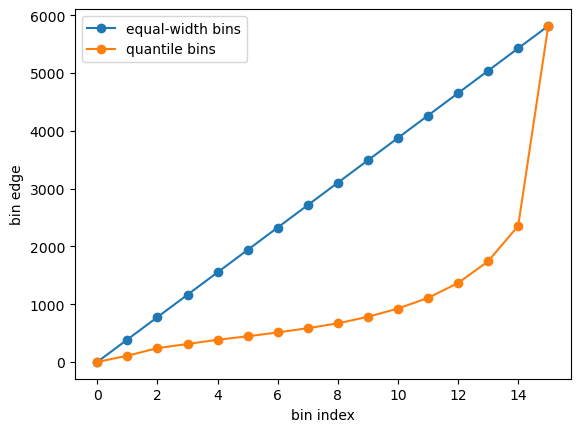

In [76]:
x = np.arange(16)
plt.plot(x, yb_dedge, marker="o", label="equal-width bins")
plt.plot(x, yb_qedge, marker="o", label="quantile bins")
plt.xlabel("bin index")
plt.ylabel("bin edge")
plt.legend()

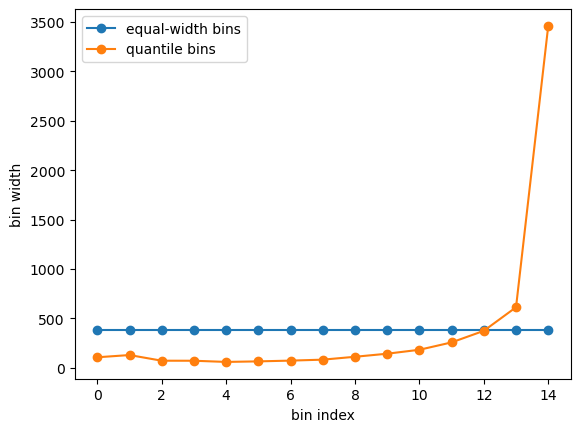

In [75]:
x = np.arange(15)
plt.plot(x, yb_dedge.diff(dim="iedge"), marker="o", label="equal-width bins")
plt.plot(x, yb_qedge.diff(dim="quantile"), marker="o", label="quantile bins")
plt.xlabel("bin index")
plt.ylabel("bin width")
plt.legend()